### DATA CLEANING AND PRE-PROCESSING SECTION

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the csv files
df = pd.read_csv("car_prices.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
df.shape

(8128, 12)

In [4]:
# Check for missing values in the dataset and show percentages
missing = df.isnull().sum()
percentage_missing = round((missing/len(df)) * 100, 2)
data_dict= {"missing_values_counts": missing,
           "missing_values_percentage": percentage_missing}

missing_df = pd.DataFrame(data_dict)
missing_df

,missing_values_counts,missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [5]:
# Dropping rows where target variables are missing
df["selling_price"].isnull().sum()
df.dropna(subset=["selling_price"], inplace=True)

In [6]:
# Plot a histogram- check distribution of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


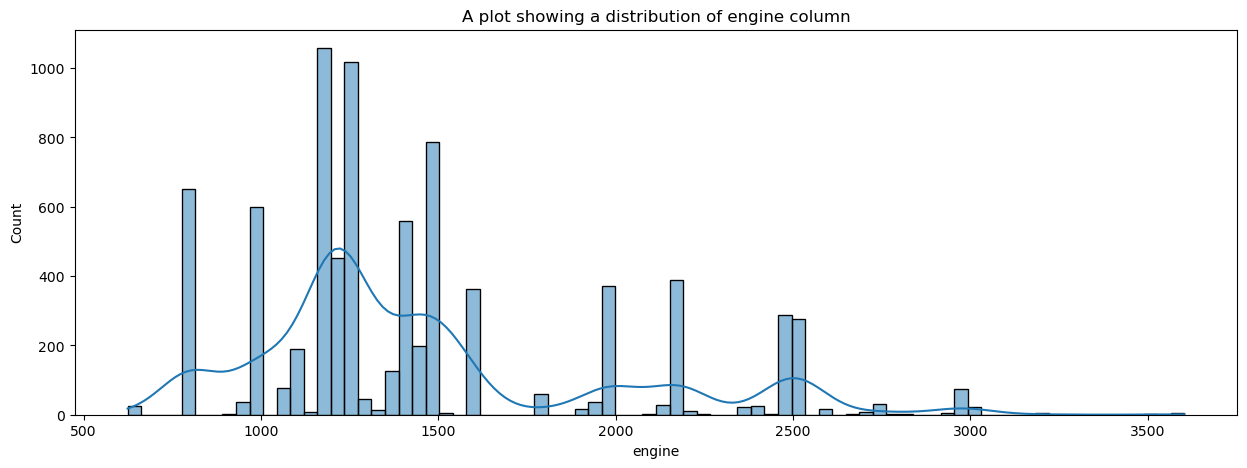

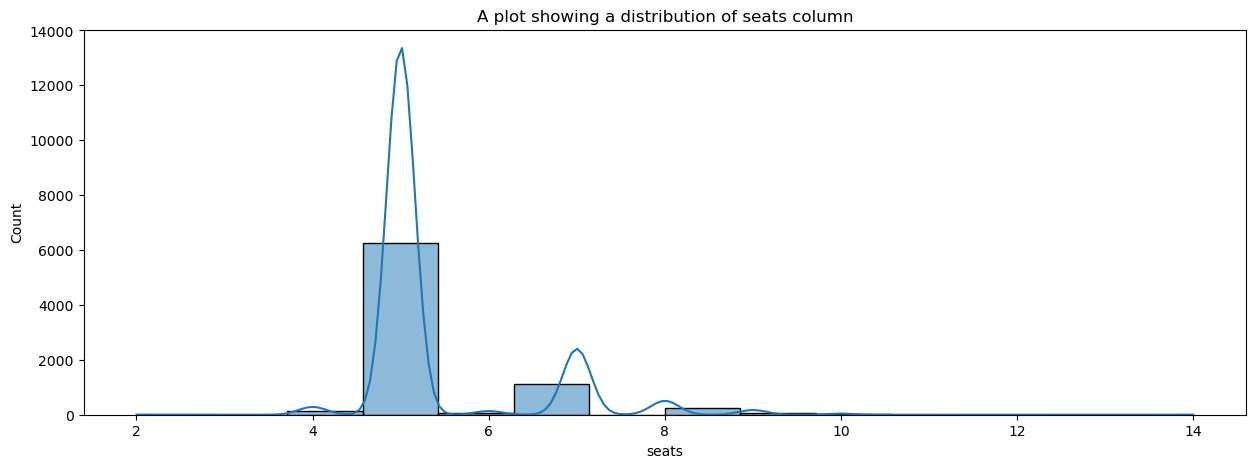

In [7]:
# Visualizing engine and seats
missing_columns = ["engine", "seats"]
for col in missing_columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f"A plot showing a distribution of {col} column")
    plt.xlabel(col)
    plt.show()

In [8]:
# Fill missing values in the "mileage" column using mean- prevents loss of data
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

In [9]:
# Filling missing values using median
for col in missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill missing values for: {col}")
    print("*"*100)

df.isnull().sum()

Fill missing values for: engine
****************************************************************************************************
Fill missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [10]:
# Fill missing values with(max_power) with mode
mode = df["max_power"].mode()
print(mode)

0    74
Name: max_power, dtype: object


In [11]:
df["max_power"] = df["max_power"].str.strip("'\'")

In [12]:
df["max_power"].replace(['', "nan", "None", " "], np.nan, inplace=True)
df["max_power"]

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_9356\4058643925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].replace(['', "nan", "None", " "], np.nan, inplace=True)


0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [13]:
df["max_power"] = pd.to_numeric(df["max_power"])

In [14]:
median = df["max_power"].median()
median

82.0

In [15]:
df["max_power"] = df["max_power"].fillna(df["max_power"].median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [17]:
df["max_power"].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  82.   ,
        67.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 ,
       171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,
        86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,
        83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   , 214.56 ,
       177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 , 204.   ,
       141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  , 108.5  ,
       103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,
        68.   ,  75.

In [18]:
df["selling_price"].unique()

array([  450000,   370000,   158000,   225000,   130000,   440000,
          96000,    45000,   350000,   200000,   500000,    92000,
         280000,   180000,   400000,   778000,   150000,   680000,
         174000,   950000,   525000,   600000,   575000,   275000,
         300000,   220000,   254999,   670000,    70000,   730000,
         650000,   330000,   366000,  1149000,   425000,  2100000,
         925000,   675000,   819999,   390000,  1500000,   700000,
        1450000,  1090000,   850000,  1650000,  1750000,  1590000,
        1689999,  1425000,   265000,   190000,   630000,   540000,
         448000,   745000,  1025000,   235000,  1700000,    50000,
        1200000,   610000,  2500000,   484999,   315000,   475000,
         290000,   455000,   351000,   535000,   175000,   565000,
         120000,   725000,   185000,   615000,   270000,   625000,
         866000,   375000,   522000,   451999,   780000,   595000,
        1140000,   360000,   105000,   135000,   690000,  3975

In [20]:
df = df.drop_duplicates()

In [21]:
# Converting year into car age
df["car_age"] = (2025-df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [22]:
# Getting unique columns in the fuel type column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [23]:
# Replacing inconsistent values in transmission column
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [25]:
# Changing inconsistencies- using lower-change from capital to small letters
df["transmission"] = df["transmission"].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


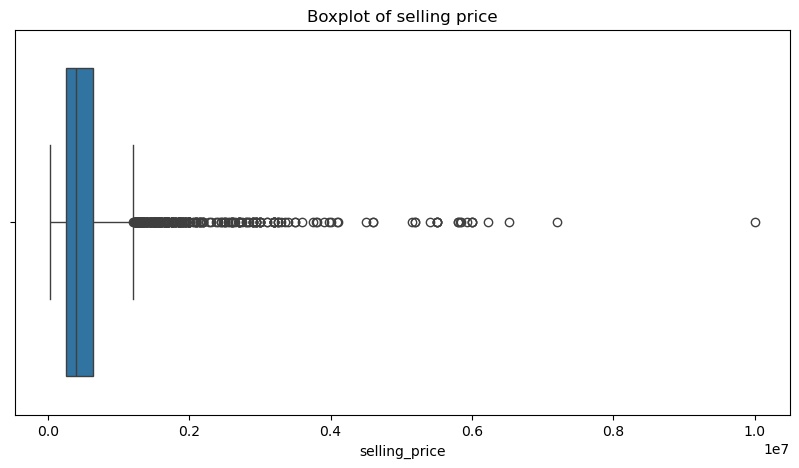

In [26]:
# Check if there are any outliers in the selling price column using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot of selling price")
plt.show()

In [27]:
median_price = df["selling_price"].median()
median_price

400000.0

In [28]:
max = df["selling_price"].max()
max

10000000

Text(0, 0.5, 'Price')

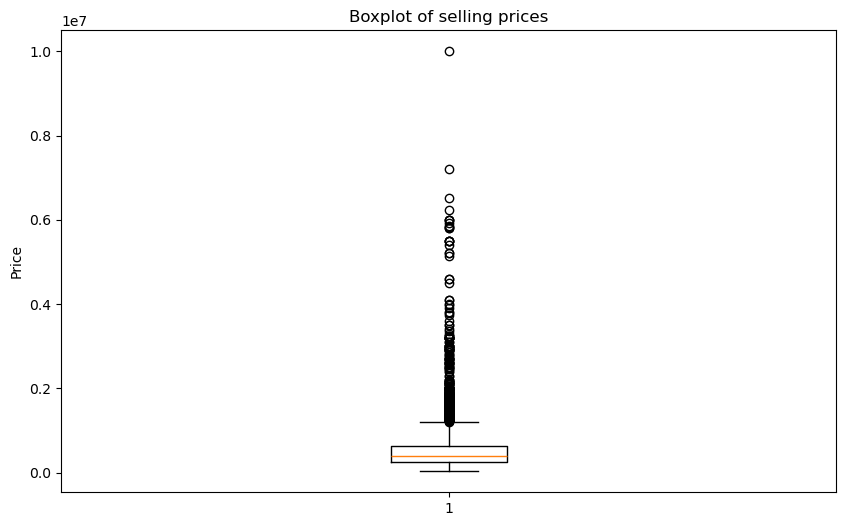

In [29]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(df['selling_price'])
# Create the boxplot
ax.set_title("Boxplot of selling prices")
ax.set_ylabel("Price")

In [30]:
# Question 10
# Remove cars that are priced below 10,000 or above 5,000,000 (outliers)

df_filtered = df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6926 non-null   float64
 11  seats               6926 non-null   float64
 12  car_age             6926 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 757.5+ KB


In [32]:
# Standardize the column names so they are all lowercse and contain underscores instead of spaces
df_filtered.columns = [col.lower().replace(' ', '_') for col in df_filtered.columns]

In [33]:
df_filtered.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')

In [34]:
# 13. Create new column for price per kilometer by dividing selling price per mileage
df_filtered['price_per_km'] = df_filtered['selling_price'] / (df_filtered['mileage(km/ltr/kg)'])
df_filtered

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_9356\3022905464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_per_km'] = df_filtered['selling_price'] / (df_filtered['mileage(km/ltr/kg)'])


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12,13756.613757
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11,21073.646850
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,17297.297297
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,8035.714286


In [35]:
# ensure the dataset is properly reset after cleaning 
df_reset = df_filtered.reset_index()
df_reset

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12,13756.613757
6902,8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11,21073.646850
6903,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,17297.297297
6904,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,8035.714286


In [36]:
# Saved the cleaned dataset
df_reset.to_csv("cleaned_cars.csv", index=False)

### Exploratory Data Analysis (EDA)

In [37]:
data = pd.read_csv(r"cleaned_cars.csv")
data.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               6906 non-null   int64  
 1   name                6906 non-null   object 
 2   year                6906 non-null   int64  
 3   selling_price       6906 non-null   int64  
 4   km_driven           6906 non-null   int64  
 5   fuel                6906 non-null   object 
 6   seller_type         6906 non-null   object 
 7   transmission        6906 non-null   object 
 8   owner               6906 non-null   object 
 9   mileage(km/ltr/kg)  6906 non-null   float64
 10  engine              6906 non-null   float64
 11  max_power           6906 non-null   float64
 12  seats               6906 non-null   float64
 13  car_age             6906 non-null   int64  
 14  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 809.4+

In [39]:
average_price = data["selling_price"].mean()
print(average_price)

501378.18114682887


In [40]:
# Find the most common fuel type in the dataset- Value Counts in Pandas
common_fuel = data["fuel"].value_counts()
print("\nValue counts for fuel type:")
print(common_fuel)


Value counts for fuel type:
fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64


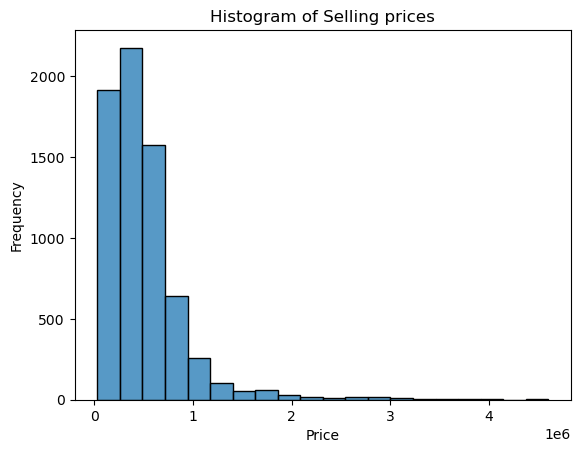

In [41]:
# Plot a histogram of the selling prices
sns.histplot(data["selling_price"], bins=20, edgecolor='black')
plt.title("Histogram of Selling prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

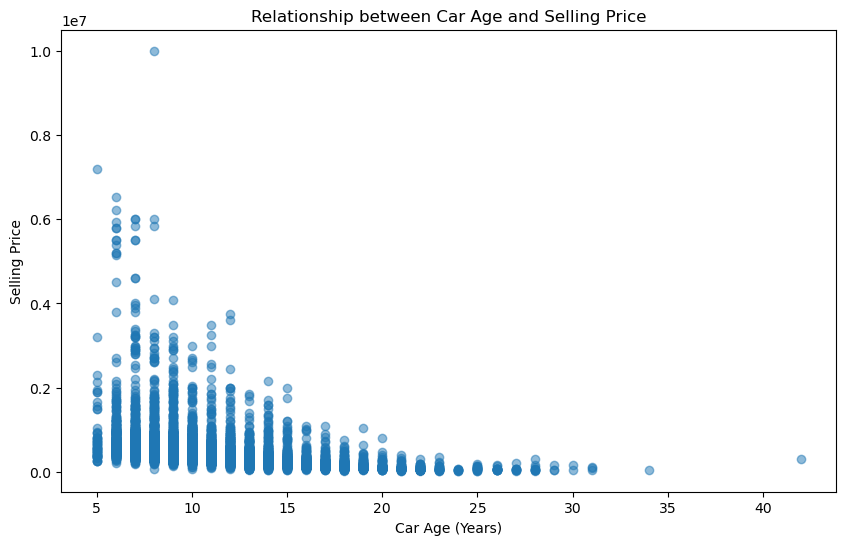

In [42]:
# Plot a relationship between car age and selling price using a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["car_age"], df["selling_price"], alpha=0.5)
plt.title("Relationship between Car Age and Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price")
plt.show()

In [43]:
# Group cars by fuel type and find the average selling price for each group
cars_grouped = data.groupby("fuel")["selling_price"].mean()
cars_grouped

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64

In [44]:
data.columns

Index(['index', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats', 'car_age', 'price_per_km'],
      dtype='object')

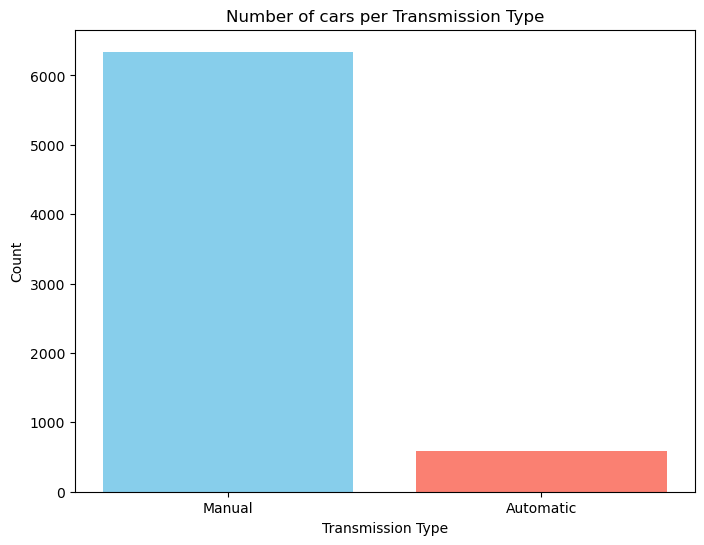

In [45]:
# Plot a bar chart showing the number of cars per transmission type
car_count = df["transmission"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(car_count.index, car_count.values, color=["skyblue", "salmon"])
plt.title("Number of cars per Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

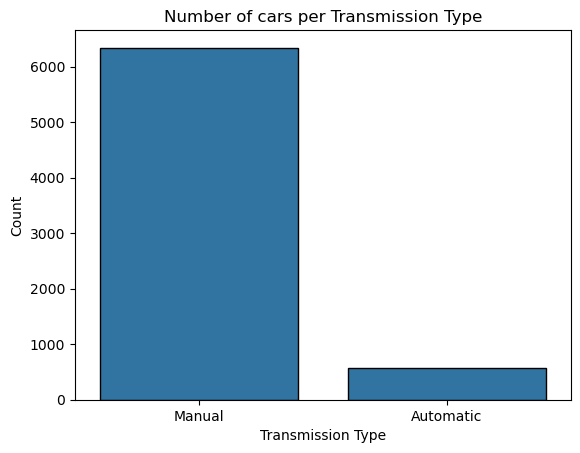

In [46]:
plt.figure(figure=(8,5))
sns.countplot(x="transmission", data=data, edgecolor='black')
plt.title("Number of cars per Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

In [47]:
# Find the car with the highest mileage in the dataset
high_mileage = data.loc[data["mileage(km/ltr/kg)"].idxmax()]
high_mileage

index                                               35
name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 35, dtype: object

In [48]:
# Calculate the correlation between mileage and selling price
correlation = df["mileage(km/ltr/kg)"].corr(df["selling_price"])
correlation

-0.1072820087481007

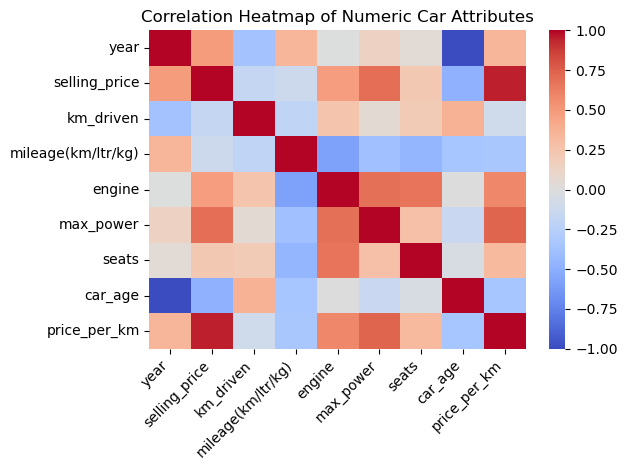

In [50]:
# Plot a heatmap showing the correlations between all numeric columns
numeric_col = ["year", "selling_price", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power", "seats", "car_age", "price_per_km"]
correlation_matrix = data[numeric_col].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numeric Car Attributes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

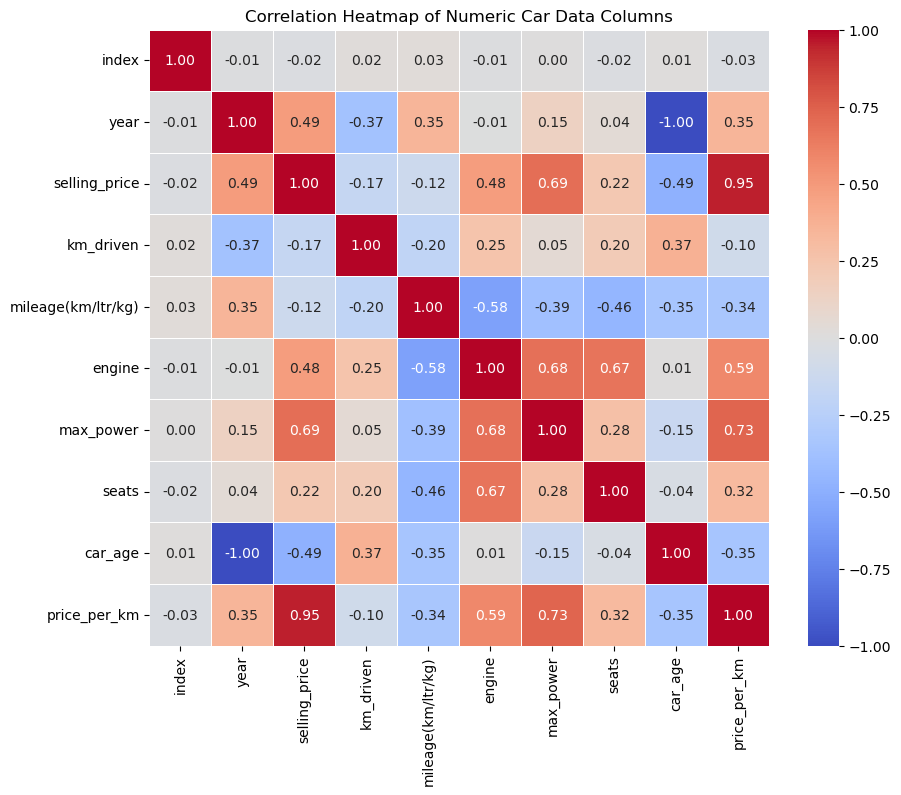

In [51]:
#Plot a heatmap showing the correlations between all numeric columns.
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Car Data Columns')
plt.show()


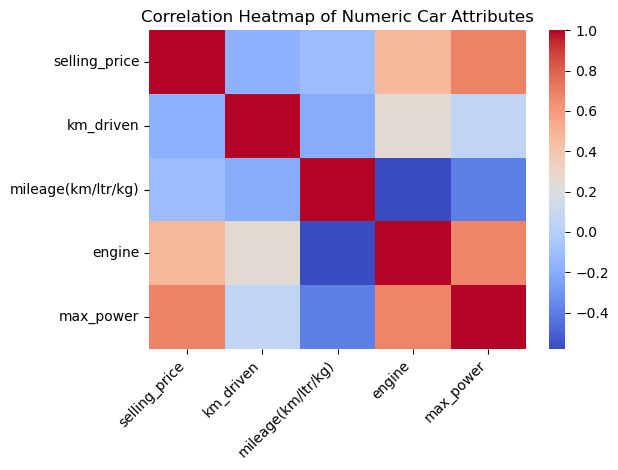

In [52]:
numeric_col = ["selling_price", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power"]
correlation_matrix = data[numeric_col].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numeric Car Attributes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
data.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [54]:
# Check if manual cars are generally cheaper or more expensive than automatic cars
manual_cars = df[df['transmission'] == 'Manual']
automatic_cars = df[df['transmission'] == 'Automatic']

avg_manual = manual_cars["selling_price"].mean()
print(f"Manual: {avg_manual}")
avg_auto = automatic_cars["selling_price"].mean()
print(f"Automatic: {avg_auto}")

Manual: 444299.07489750866
Automatic: 1309712.3047945206


In [55]:
#Check if manual cars are generally cheaper or more expensive than automatic cars.
car_price = data.groupby('transmission')['selling_price'].mean().sort_values(ascending=True)
car_price

transmission
Manual       4.442991e+05
Automatic    1.143215e+06
Name: selling_price, dtype: float64

In [56]:
# Find the average selling price for each year of manufacture
avg_selling_price = data.groupby("year")["selling_price"].mean()
avg_selling_price

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64

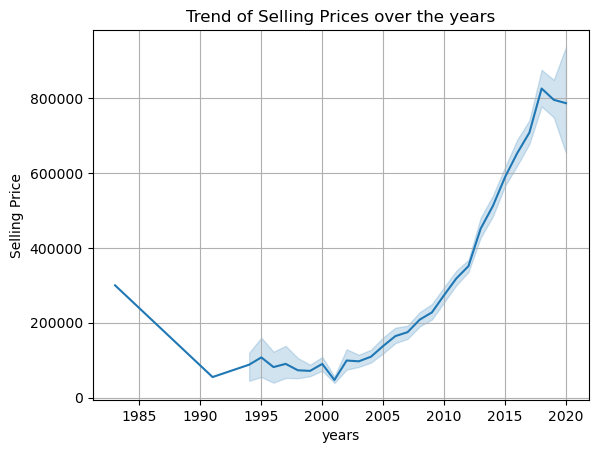

In [57]:
# Plot a line chart showing the trend of selling prices over the years
plt.Figure(figsize=(10, 8))
sns.lineplot(data, x='year', y='selling_price')
plt.title("Trend of Selling Prices over the years")
plt.xlabel("years")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [58]:
# Find the most expensive car for each fuel type
# loc- label-based indexing of a dataframe
expensive_car = data.loc[data.groupby("fuel")["selling_price"].idxmax()]
exp = expensive_car[["fuel", "name", "selling_price"]]
print(exp)

        fuel                                      name  selling_price
4961     CNG     Maruti Ertiga VXI CNG Limited Edition         545000
283   Diesel  Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000
2783     LPG               Hyundai i10 Sportz 1.1L LPG         375000
133   Petrol           Jeep Wrangler 2016-2019 3.6 4X4        4100000


In [59]:
# Find out which brand appears most frequently in the dataset
frequent = data["name"].value_counts()
frequent

name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Maruti Celerio X ZXI Option BSIV                  1
Tata Manza ELAN Quadrajet BS IV                   1
Mercedes-Benz B Class B180 Sports                 1
Skoda Superb Elegance 1.8 TSI AT                  1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 2048, dtype: int64

In [60]:
frequent = data["name"].value_counts()
frequent

name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Maruti Celerio X ZXI Option BSIV                  1
Tata Manza ELAN Quadrajet BS IV                   1
Mercedes-Benz B Class B180 Sports                 1
Skoda Superb Elegance 1.8 TSI AT                  1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 2048, dtype: int64

In [61]:
data["brand"] = data["name"].str.split().str[0]
frequent_brand = data["brand"].value_counts().idxmax()
count = data["brand"].value_counts().max()
print(f"The brand that appears frequently is {frequent_brand} with a count of {count}")

The brand that appears frequently is Maruti with a count of 2165


In [62]:
# Check the top 5 most common combinations of fuel type and transmission
combinations = data.groupby(["fuel", "transmission"]).size().reset_index(name="count")
combinations

,fuel,transmission,count
0,CNG,Manual,56
1,Diesel,Automatic,284
2,Diesel,Manual,3457
3,LPG,Manual,38
4,Petrol,Automatic,280
5,Petrol,Manual,2791


In [63]:
top_5 = combinations.sort_values(by="count", ascending=False).head(5)
print(top_5)

     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


# Machine Learning

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Main Assumptions of LInear Regression
1. Linearity- Linear regression needs the relationship between independent and dependent variables to be linear. It is also necessary to check for outliers since linear regression is sensitive to outliers. This can be tested using scatter plots.
2. Normality of residuals- Linear regression analysis requires variables to be multivariate normal. This can checked using a histogram. To check for normality, use a goodness of fit test like the Kolmogorov Smirnov test.
3. No multicollinearity- Linear regression assumes there is little or no multicollinearity in the data. Inputs should not be higly correlated which can cause multicollinearity.
4. Independence of errors- each eroor term should be independent of others.
5. Homoscedasticity- variance of residuals should be constant across alllevels of independent variables.

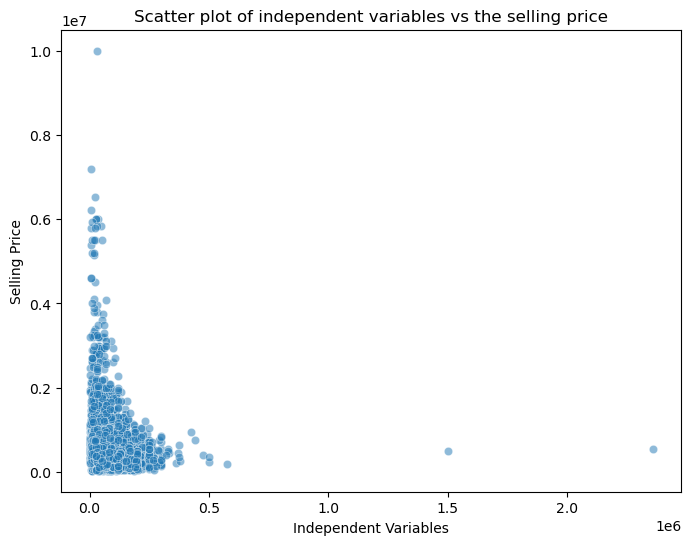

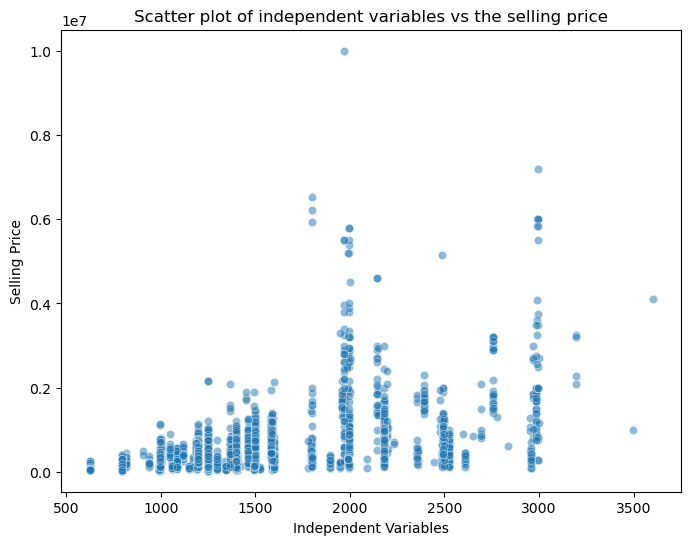

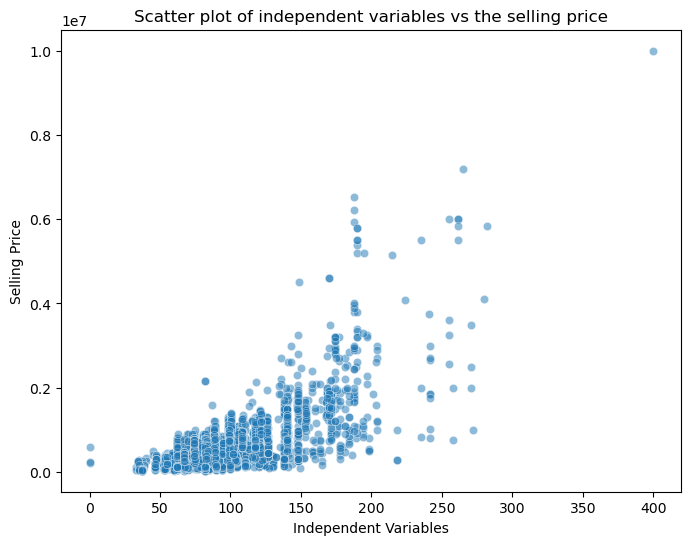

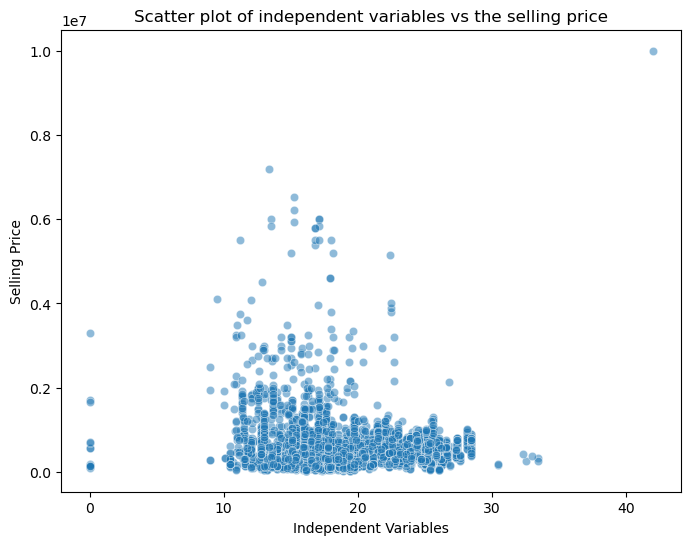

In [87]:
# What are the main assumptions of Linear Regression, and how can you check them using this dataset?
# Building and training the model
# Scatter plots to check for linearity
import matplotlib.pyplot as plt
import seaborn as sns
x1 = ['km_driven', 'engine', 'max_power', 'mileage(km/ltr/kg)']
y1 = df["selling_price"]

# Visualizing
for item in x1:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[item], y=y1, alpha=0.5)
    plt.title("Scatter plot of independent variables vs the selling price")
    plt.xlabel("Independent Variables")
    plt.ylabel("Selling Price")
    plt.show()


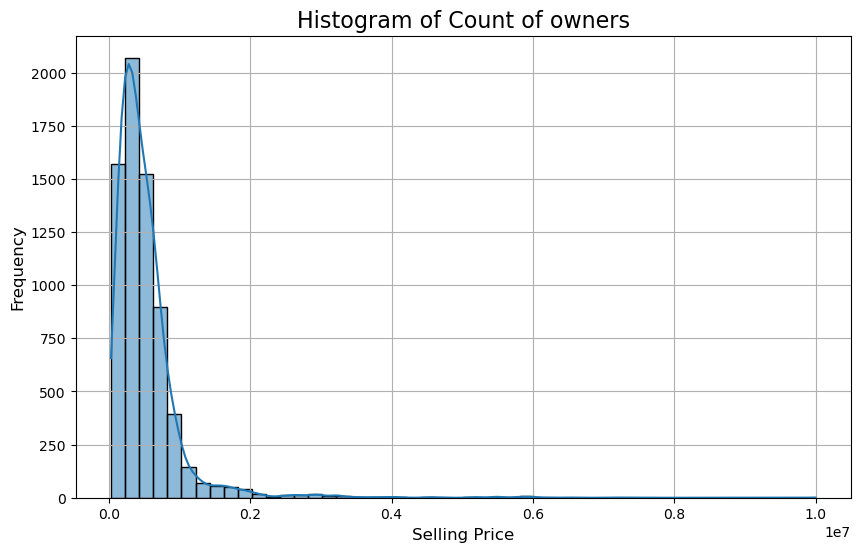

In [114]:
# Plotting a histogram
# Checks for Normality.
plt.figure(figsize=(10, 6))
sns.histplot(x=df["selling_price"], bins=50, kde=True)
plt.title('Histogram of Count of owners', fontsize=16)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

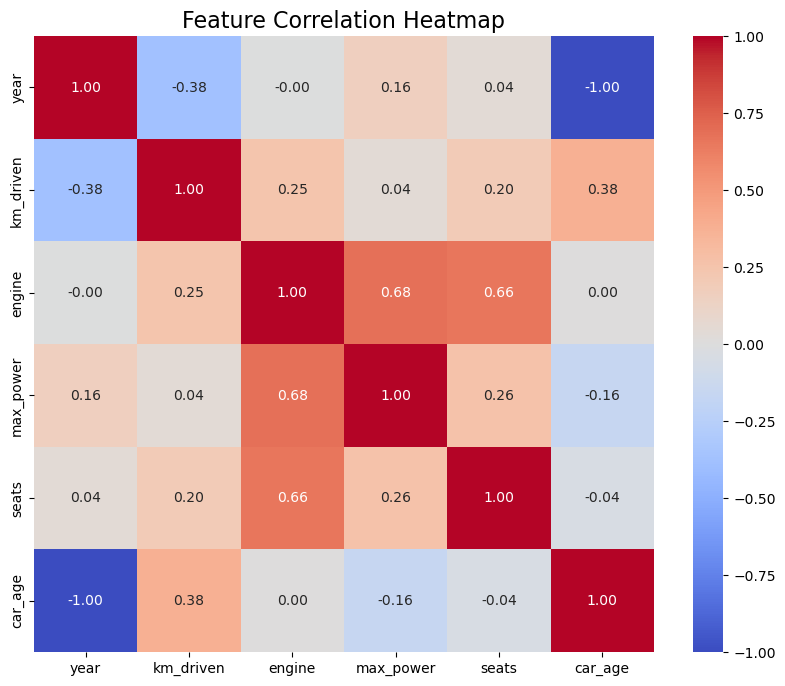

In [109]:
# Plotting correlation matrix to check for multicollinearity
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [89]:
# Train a Linear Regression model to predict the car’s selling price using selected features
# Print intercepts and coefficient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['year', 'km_driven', 'engine', 'max_power', 'seats']]
y = df["selling_price"]

In [90]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: -76122605.05803224
Slope: 37665.95182995097


In [91]:
# Train a Linear Regression model to predict the car’s selling price using selected features
# Print intercepts and coefficient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['year', 'km_driven', 'engine', 'max_power', 'seats', 'car_age']]
y = df["selling_price"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: -37985828.8302069
Slope: 18832.975914975497


In [92]:
# Linear Regression using r2 score and MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))

Linear Regression MSE: 99310666883.76315
Linear Regression R2 Score: 0.5471916390860143


In [93]:
# Apply Lasso Regression and compare its performance with Linear Regression
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso R2 Score:", r2_score(y_test, lasso_pred))

Lasso MSE: 99310669133.75464
Lasso R2 Score: 0.547191628827147


c:\Builder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.164e+14, tolerance: 1.566e+11
  model = cd_fast.enet_coordinate_descent(


In [94]:
# Apply ridge regression and compare its performance with both linear and lasso regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge R2 Score:", r2_score(y_test, ridge_pred))

Ridge MSE: 99310672337.52672
Ridge R2 Score: 0.5471916142195039


In [95]:
# Use cross validation to evaluate your ridge regression model
# Cross validation checks how well a machine learning model performs on unseen data
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Performing k-fold cross-validation
cross_val_results = cross_val_score(ridge, X, y, cv=5, scoring="r2")
mse = -cross_val_score(ridge, X, y, cv=5, scoring="neg_mean_squared_error")

# Results
print("R-squared scores for each fold:")
print(cross_val_results)

print("MSE scores for each fold:")
print(mse)



R-squared scores for each fold:
[0.57547545 0.60748673 0.61248322 0.53031523 0.57710311]
MSE scores for each fold:
[1.82797396e+11 8.75685847e+10 8.30923580e+10 1.22050710e+11
 9.34925095e+10]


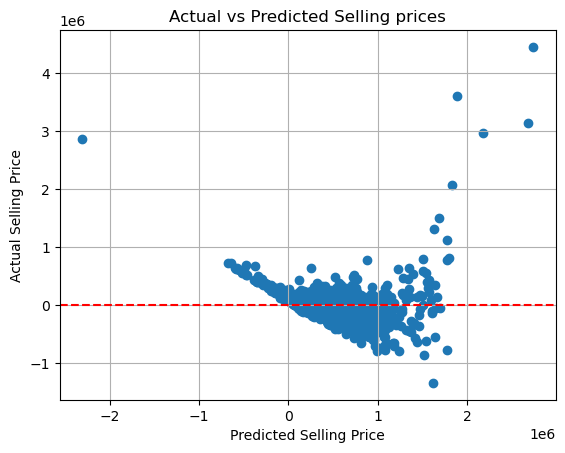

In [96]:
# Plot the predicted vs actual prices of your best performing model
# best performing model is Linear Regression
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Actual vs Predicted Selling prices")
plt.xlabel("Predicted Selling Price")
plt.ylabel("Actual Selling Price")
plt.grid(True)
plt.show()

In [101]:
# Use Grid search CV to find the best alpha value for Ridge regression
# Define the grid
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": np.logspace(-4, 2, 10)}
ridge=Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid cv to data
grid_search.fit(X, y)

# best alpha found and the corresponding score
print("Best alpha value found by Grid Search:", grid_search.best_params_["alpha"])
print("Best Mean Squared Error:", grid_search.best_score_)

c:\Builder\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.80342e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Builder\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.41339e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Builder\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70699e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Builder\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00805e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Builder\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.91053e-18): result m

Best alpha value found by Grid Search: 100.0
Best Mean Squared Error: -113797507059.3569


In [107]:
# Try polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Fitting polynomial regression model
poly =PolynomialFeatures(degree=2)
Xtrain_poly=poly.fit_transform(X_train)
Xtest_poly=poly.transform(X_test)

# Linear regression
poly_lin=LinearRegression()
poly_lin.fit(Xtrain_poly, y_train)

# Predictions
ypred_poly=poly_lin.predict(Xtest_poly)

# Output
print("MSE_poly:", mean_squared_error(y_test, ypred_poly))
print("R2 score poly:", r2_score(y_test, ypred_poly))

MSE_poly: 53353066942.09514
R2 score poly: 0.7567359524424451


# Best Performing Model
Polynomial Regression worked best.
- LInear Regression, Ridge and Lasso had almost similar r2 scores of 0.55. This shows that they could explain 55% of the varince in the car selling price.
- As for polynomial regression, it had an r2 score of 0.76, which is closer to 1 making it the better performing model.

Why is polynomial better?
- It captures non linear patterns making it suitable to fit trends that may not be captured byb simple linear patterns improving predictions for the car selling price.

How to imprive next predictions:
1. Creating new features- e.g combining selling price and max power to find the price per horsepower.
2. Encoding Categorical features like the transmission column, 0to represent Manual, and 1 to represent Automatic.
